# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [22]:
import numpy as np

#Function that takes 3 lengths of a triangle and computes the area using Heron's Formula
def triangle_area_heron(a, b, c):
    s = ((a + b) + c)/2 #Defining s from Heron's fomrula
    area = np.sqrt(s*(s-a)*(s-b)*(s-c)) #Implimenting Heron's formula
    return area

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [23]:
import numpy as np

#Function that takes in three lengths of a triangle and computes the area using Kahan's formula
def triangle_area_kahan(a, b, c):
    array = np.array([a, b, c]) #Turn inputs a,b,c into an array
    sorted_array = np.sort(array)[::-1] #Sort into descending order s.t a>b>c
    a1, b1, c1 = sorted_array #Assign the sorted input a,b,c into new variables
    area = 1/4 * np.sqrt((a1+(b1+c1))*(c1-(a1-b1))*(c1+(a1-b1))*(a1+(b1-c1))) #Implimenting Kahan's Formula
    return area

**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

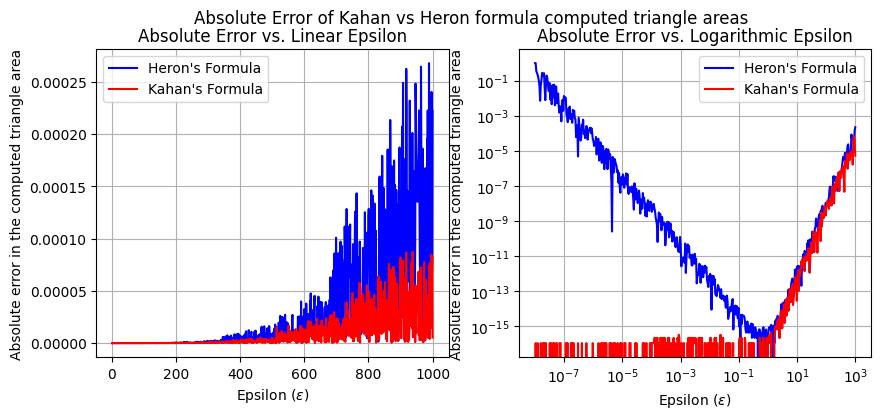

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#Function to compute the triangle's area using Heron's Formula

def triangle_area_heron(a, b, c):
    s = ((a + b) + c)/2
    area = np.sqrt(s*(s-a)*(s-b)*(s-c)) #Heron's Formula
    return area

#Function to compute the triangle's area using Kahan's Formula

def triangle_area_kahan_vectorised(a, b, c):
    stacked = np.stack([a, b, c], axis=0) #Turn into 2D arrays
    sorted_array = np.sort(stacked, axis = 0)[::-1] #Ensure a>b>c by sorting the inputs
    a1, b1, c1 = sorted_array #Extracting the sorted values and putting them in new variables
    area = 1/4 * np.sqrt((a1+(b1+c1))*(c1-(a1-b1))*(c1+(a1-b1))*(a1+(b1-c1))) #Kahan's Formula
    return area

#Generating a range of values for epsilon to plot

epsilon_lin = np.linspace(1, 1000, 1000) #1000 values linearly spaced from 1 to 1000
epsilon_log = np.logspace(-8, 3, 500) #500 values logarithmically spaced from 10^-8 to 10^-1

#Computing the sides of the triangle for the linearly spaced epsilon
a2 = 2*epsilon_lin
b2 = np.sqrt(1+epsilon_lin**4)/epsilon_lin
c2 = b2

#Computing the sides of the triangle for the logarithmically spaced epsilon
a3 = 2*epsilon_log
b3 = np.sqrt(1+epsilon_log**4)/epsilon_log
c3 = b3

#Computing absolute error values for both formula's inputting linear epsilon
kahan_error_lin = abs(triangle_area_kahan_vectorised(a2, b2, c2) - 1)
heron_error_lin = abs(triangle_area_heron(a2, b2, c2) - 1)

#Computing absolute error values for both formula's inputting logarithmic epsilon
kahan_error_log = abs(triangle_area_kahan_vectorised(a3, b3, c3) - 1)
heron_error_log = abs(triangle_area_heron(a3, b3, c3) - 1)

#Creating two plots side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#First plot comparing the absolute errors of both the formulas on a linear scale
ax[0].plot(epsilon_lin, heron_error_lin, label="Heron's Formula", color="b")
ax[0].plot(epsilon_lin, kahan_error_lin, label="Kahan's Formula", color="r")
ax[0].set_ylabel("Absolute error in the computed triangle area")
ax[0].set_xlabel(r"Epsilon ($\epsilon$)")
ax[0].set_title(r"Absolute Error vs. Linear Epsilon")
ax[0].legend()
ax[0].grid(True)

#Second plot comparing the absolute errors of both the formulas on a logarithmic scale
ax[1].loglog(epsilon_log, heron_error_log, label="Heron's Formula", color="b") #log scale on both x & y axis for both plots
ax[1].loglog(epsilon_log, kahan_error_log, label="Kahan's Formula", color="r") 
ax[1].set_ylabel("Absolute error in the computed triangle area")
ax[1].set_xlabel(r"Epsilon ($\epsilon$)")
ax[1].set_title("Absolute Error vs. Logarithmic Epsilon")
ax[1].legend()
ax[1].grid(True)

fig.suptitle("Absolute Error of Kahan vs Heron formula computed triangle areas")

plt.show()


## Discussion

I've investigated varying size of epsilon and how this impacts the accuracy of both Kahan's formula and Heron's Formula when they are computed in python. In Prof. W. Kahan's paper, he describes how Heron's fomrula breaks down as the triangle approaches a needlelike shape, this is because python encounters rounding errors for numbers with many decminal places. In the first graph, where epsilon is varied linearly from 1-1000, you can clearly see the absolute error of both formulas increase as epsilon increases, although Heron's absolute error is notably larger for nearly all values of epsilon.  As epsilon ranges from 1-1000, the absolute error for Heron ranges from 0 to ~2.5x10^-4, whilst kahan's error runs from 0 to ~1x10^-4. In the second graph, I have focused on when epsilon is very small, specifically between 10^-8 and 10^3. It's clear Kahan's formula is much more accurate for small epsilon since as epsilon ranges from 10^-8 to 1, the absolute error remains below 10^-15. Comparing that to Heron's formula, there is  almost a y=a-x (for some positive a) relationship between absolute error and size of epsilon on the log-log graph (episilon < 1). For small epsilon (10^-8), absolute error approaches 1, and as epsilon increases, up to 1 for example, absolute error reduces down to 10^-15. Extending epsilon below 10^-8 led to catastrophic numerical instability. Since the precision of the machine is approximately 10^-16, and Heron's formula involves a square root operation, the theoretical maximum accuracy is limited to about the square root of machine precision, which is 10^-8. Beyond this threshold, floating-point rounding errors dominate, causing unreliable results. As epsilon increases past 1, we can see that both the absolute errors from both functions are of the same magnitude from looking at the log-log graph. 

## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [25]:
import numpy as np

def sequence_element(n):
    #Computes the nth term of a recursive sequence defined by x_n+1  = A * x_n
    #Takes n, the index of the sequence term, as an input
    #Outputs a (2, 1) column vector representing x_n
    A = np.array([[0, 1], #Defining the transformation matrix A
                 [1, 1]])
    x0 = np.array([[1], #Initialising x0 as a column vector
                  [1]])
    x = np.linalg.matrix_power(A, n) @ x0 #Computes A^n * x using matrix exponentiation
    return x

**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

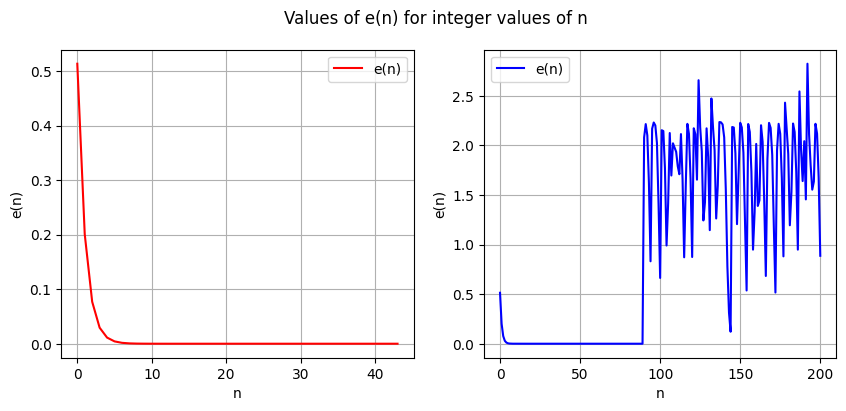

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def sequence_element(n):
    #Computes the nth term of a recursive sequence defined by x_n+1  = A * x_n
    #Takes n, the index of the sequence term, as an input
    #Outputs a (2, 1) column vector representing x_n
    A = np.array([[0, 1], #Defining the transformation matrix A
                 [1, 1]])
    x0 = np.array([[1], #Initialising x0 as a column vector
                  [1]])
    x = np.linalg.matrix_power(A, n) @ x0 #Computes A^n * x using matrix exponentiation
    return x

A = np.array([[0, 1], #Defininig the matrix A outside of the function sequence_element (global)
              [1, 1]])

alpha = np.linalg.eigh(A)[0][1] #Defining the largest eigenvalue of the matrix A 

def en(n):
    """
    Computes e(n) which measures how well sequence_element(n) aligns with the dominant eigenvector of matrix A.
    It takes in an integer n as an input which is the index for which sequence_element is computed
    and returns a float en which is the computed relative error
    """
    numerator = A @ sequence_element(n) - alpha*sequence_element(n) #Calculates the numerator - absolute error
    denominator = sequence_element(n) #Calculates the denominator
    en = np.linalg.norm(numerator, ord=2)/np.linalg.norm(denominator, ord=2) #Calculates the euclidean 2 norm ratio
    return en #Returns relative error

n_lin = np.linspace(0, 43, 44) #Generates 44 linearly spaced values of n from 0 to 43
n_lin_large = np.linspace(0, 200, 201) #Generates 201 linearly spaced values of n from 0 to 200

e_lin = np.array([en(int(i)) for i in n_lin]) #Computes e(n) for each n in n_lin
e_lin_large = np.array([en(int(i)) for i in n_lin_large]) #Computes e(n) for each n in n_lin_large

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) #Setting up two parallel subplots for visualisation

#Plotting for small n (0-43)
ax[0].plot(n_lin, e_lin, color="r", label="e(n)")
ax[0].set_xlabel("n")
ax[0].set_ylabel("e(n)")
ax[0].legend()
ax[0].grid(True)

#Plotting for larger n (0-200) to convey how the code breaks down if n is too large 
ax[1].plot(n_lin_large, e_lin_large, color="b", label="e(n)")
ax[1].set_ylabel("e(n)")
ax[1].set_xlabel("n")
ax[1].legend()
ax[1].grid(True)

#Overall title for both plots
fig.suptitle("Values of e(n) for integer values of n")
plt.show()






## Discussion

In the preceding code, I investigated the relationship between e(n) and n, where e(n) quantifies how well a_x aligns with the dominant eigenvector of A, which corresponds to the eigenvalue alpha. Generally, I conclude that as n increases, x_n becomes aligned more with the dominant eigenvector, so that e(n) exponentially decreases. From 0<=n<=7, e(n) decreased exponentially as n increased, from 0.5 to near 0. e(n) then remained near 0 until n = 43, as seen by the flat redline on the subplot about y=0. At which point, the numerical results exhibit erratic behaviour, fluctuating between 0 and 3, compared to <0.5 before n=43. This is shown in blue on the second subplot, with the red subplot showing the exponential decrease. The code breaks down after n=43, because the use of matrix exponentiation leads to rapidly growing x_n that exceeds machine precision, leading to losses of significant figures in the floating-point representation. When computing A*x_n-alpha*x_n, the numerical discrepancies when n is large can cause catastrophic cancellation, contributing towards e(n)'s erratic behaviour. Theoretically, x_n should be a scaled version of the dominant eigenvector as n grows, but this is hard to show due to finite arithmetic in computers which prevents perfect convergence



## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [27]:

import numpy as np


def interpolatory_quadrature_weights(x):
    #This function outputs an array of quadrature weights for N+1 in x quadrature points
    n = len(x) - 1
    Vandermonde = np.vander(x, increasing=True)  #Vandermonde matrix with powers increasing left to right
    b = np.zeros(n + 1) #Initialising my monomial integral vector
    # Special case: Midpoint rule when N=0 (single quadrature point)
    if n == 0:
        return np.array([2.0])  # The integral over [-1,1] for f(x) = 1 is exactly 2
    for i in range(n + 1):
        b[i] = (x[-1]**(i + 1) - x[0] **(i +1))/(i+1) #Filling up my monomial integral vector with exact integrals ofx^k for each i
    w = np.linalg.solve(Vandermonde.T, b) #Solves V^T*w = b, where w contains an array of corresponding weights
    return w


#Test 1:Midpoint Rule (Interval [-1,1])
x_mid = np.array([0.0])  #One quadrature point at the center
w_mid = interpolatory_quadrature_weights(x_mid)
expected_mid = np.array([2.0])  #expected weight for midpoint rule
if np.allclose(w_mid, expected_mid):
    print("Works")
else:
    print("Failed")

#Test 2:Trapezoidal Rule (Interval [-1,1])
x_trapz = np.array([-1.0, 1.0])  #Two quadrature points at the interval endpoints
w_trapz = interpolatory_quadrature_weights(x_trapz)
expected_trapz = np.array([1.0, 1.0])  #Each endpoint gets equal weight
if np.allclose(w_trapz, expected_trapz):
    print("Works")
else:
    print("Failed")

#Test 3:Simpson’s Rule (Interval [-1,1])
x_simp = np.array([-1.0, 0.0, 1.0])  # Three points: left, middle, right
w_simp = interpolatory_quadrature_weights(x_simp)
expected_simp = np.array([1 / 3, 4 / 3, 1 / 3]) #Should follow 1:4:1 ratio
if np.allclose(w_simp, expected_simp):
    print("Works")
else:
    print("Failed")


Works
Works
Works


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

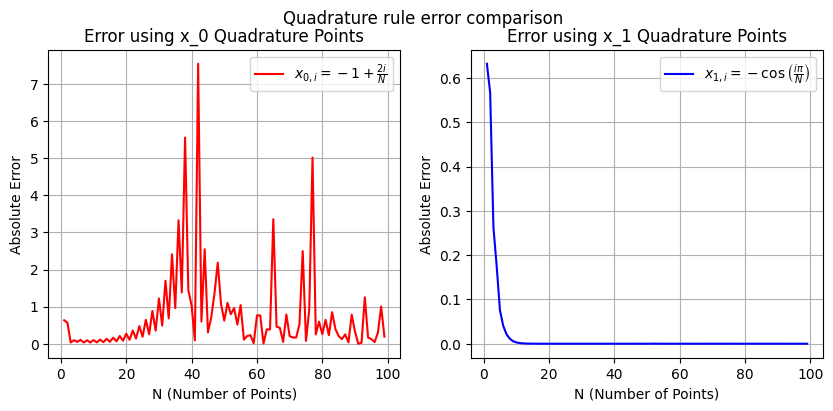

In [28]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


def interpolatory_quadrature_weights(x):
    #This function outputs an array of quadrature weights for N+1 in x quadrature points
    n = len(x) - 1
    Vandermonde = np.vander(x, increasing=True)  #Vandermonde matrix with powers increasing left to right
    b = np.zeros(n + 1) #Initialising my monomial integral vector
    # Special case: Midpoint rule when N=0 (single quadrature point)
    if n == 0:
        return np.array([2.0])  # The integral over [-1,1] for f(x) = 1 is exactly 2
    for i in range(n + 1):
        b[i] = (x[-1]**(i + 1) - x[0] **(i +1))/(i+1) #Filling up my monomial integral vector with exact integrals ofx^k for each i
    w = np.linalg.solve(Vandermonde.T, b) #Solves V^T*w = b, where w contains an array of corresponding weights
    return w

def f(x):    #Defining the function that we want to integrate
    func = 1 / (1+(3*x)**2)
    return func

def computed_integral(x):
    w = interpolatory_quadrature_weights(x)  #Computes quadrature approximation given x quadrature points
    integral_c = np.sum(w*f(x))  #Computed weighted sum
    return integral_c

def exact_integral(): #Compute Exact integral using scipy's quadrature function
    integral_e = quad(f, -1, 1)[0] #Only extract the answer, disgard the error estimate since insignifcant
    return integral_e

def quad_points(n):
    x0 = np.linspace(-1, 1, n+1) #Linearly spaced quadrature points
    x1 = -np.cos(np.linspace(0, np.pi, n+1)) #Trigonometrically spaced quadrature points
    return x0, x1

ns = np.arange(1, 100, 1) #Defining ns as an array of integers increasing from 1 to 99 in steps of 1
x0_errors =[] #Initialising x_0 absolute error array
x1_errors =[] #Initialising x_1 absolute error array

I = exact_integral() #Compute exact integral for reference

for n in ns:
    x0, x1 = quad_points(n) #generates the quadrature points
    I_x0 = computed_integral(x0) #computes integral using x_0 points
    I_x1 = computed_integral(x1) #computes integral using x_1 points
    x1_errors.append(abs(I_x1-I)) #computes absolute errors
    x0_errors.append(abs(I_x0-I)) #computes absolute errors

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) #Setting up two parallel plots

#Plots errors from x_0 quadrature points
ax[0].plot(ns, x0_errors, color="r", label=r"$x_{0,i} = -1 + \frac{2i}{N}$")
ax[0].set_xlabel("N (Number of Points)")
ax[0].set_ylabel("Absolute Error")
ax[0].set_title("Error using x_0 Quadrature Points")
ax[0].grid(True)
ax[0].legend()

#Plots errors from x_1 quadrature points
ax[1].plot(ns, x1_errors, color="b", label=r"$x_{1,i} = -\cos\left(\frac{i\pi}{N}\right)$"
)
ax[1].set_xlabel("N (Number of Points)")
ax[1].set_ylabel("Absolute Error")
ax[1].set_title("Error using x_1 Quadrature Points")
ax[1].grid(True)
ax[1].legend()

#Overall title for plots
plt.suptitle("Quadrature rule error comparison")
plt.show()






## Discussion

In the preceding code, I investigated the accuracy of two different quadrature rules for approximating the integral f(x) = 1 / ( 1+(3x)^2) between -1 and 1, where the sets of quadrature points x_0 were equally spaced, and x_1 were trigonometrically spaced. I plotted absolute error from computing the integral with both these quadrature points. The uniformly spaced points x_0, the absolute error exhibited was highly irregular. For small n, the error oscillated exponentially up to ~35 for n<40. After reaching n≈40, the error dropped below 5 but spiked again near n ≈ 60, reaching values close to 30 before continuing to oscillate between 0 and 8 up to n=100. This is all shown in the subplot with the red line. These fluctuations perhaps suggest that Runge’s phenomenon is taking place, where equally spaced points in polynomial interpolation lead to large oscillations and loss of accuracy. In stark contrast to this, x_1, the trigonometrically spaced quadrature points proved to have much lower absolute error. It’s error decreased exponentially starting from just over 0.6 to near 0 by n=10, and has n increased past 10, the error became negligible. Therefore, it was a much more stable and accurate estimate of the integral f(x), increasing accuracy as n increases.